# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Ana Sofia Del Rio
*Métodos computacionales 2025-I*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect, fixed_point

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

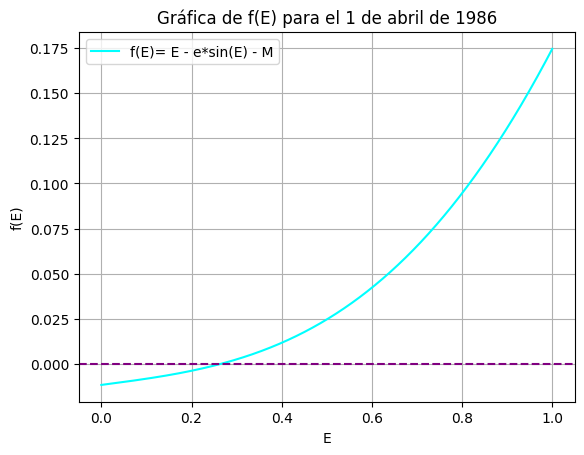

Con el método de newton E= 0.26340018969102164
Con el método de la secante E= 0.2634001896910682


In [ ]:
#Cometa Halley
e = 0.9672671
T = 75.96000
t0 = 1986.1113
t_1abril = 1986.1113 + 51/365 #Días entre 9 feb y 1 abr

#Calcular M
def M(t):
  return 2 * np.pi / T * (t - t0)
M_1abril = M(t_1abril)

#Graficamos f(E)
E_vals= np.linspace(0,1,1000)
f_vals = E_vals - e*np.sin(E_vals) - M_1abril

plt.plot(E_vals,f_vals, label='f(E)= E - e*sin(E) - M', color='cyan')
plt.title('Gráfica de f(E) para el 1 de abril de 1986')
plt.axhline(0, color='purple', linestyle='--')
plt.xlabel('E')
plt.ylabel('f(E)')
plt.grid()
plt.legend()
plt.show()

#Usando el método de Newton y Secante
f= lambda E: E - e*np.sin(E) - M_1abril
E_newton = newton(f, x0=0.2 )
print(f'Con el método de newton E= {E_newton}')
E_secante = newton(f, x0=0.2, x1=0.3)
print(f'Con el método de la secante E= {E_secante}')



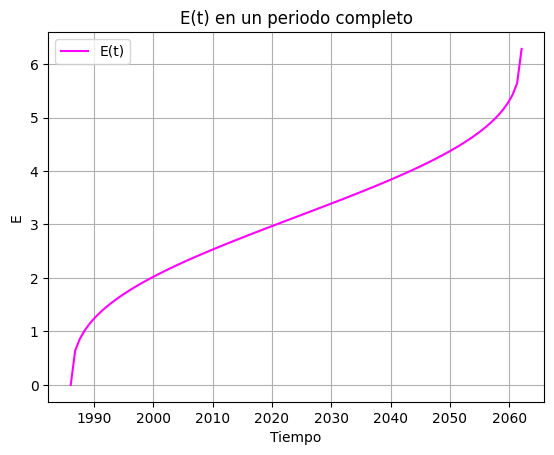

In [ ]:
#Graficamos E = E(t)
tiempo = np.linspace(t0, t0 + T, 101)  #101 puntos incluyendo a t0
M_vals = 2 * np.pi / T * (tiempo - t0)
E_vals = []

for i in M_vals:
    f_i = lambda E: E - e * np.sin(E) - i
    E_vals.append(newton(func=f_i, x0=0.5))


plt.plot(tiempo, E_vals, color = 'magenta', label='E(t)')
plt.title('E(t) en un periodo completo')
plt.xlabel('Tiempo')
plt.ylabel('E')
plt.grid()
plt.legend()
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Con el método de la secante m= 0.9575
Con el método de Newton m= 0.9575
Con el método de punto fijo m= 0.9575


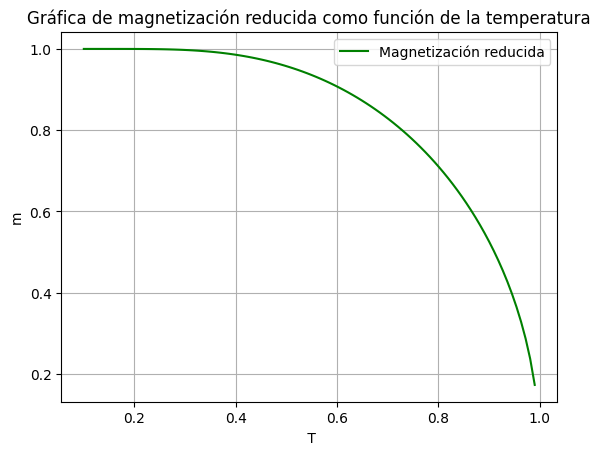

In [ ]:
def f(m, T=0.5):
  return np.tanh(m / T) - m
def g(m, T=0.5):
  return np.tanh(m / T)

T=0.5
#Usando el método de la secante y Newton
m_secante= newton(f, x0=1, x1=2, args=(T,))
print(f'Con el método de la secante m= {m_secante:.4f}')
m_newton= newton(f, x0=1, args=(T,))
print(f'Con el método de Newton m= {m_newton:.4f}')
#Validando con el método de punto fijo
m_punto_fijo= fixed_point(g, x0=1, args=(T,))
print(f'Con el método de punto fijo m= {m_punto_fijo:.4f}')

#Graficamos
T_vals = np.linspace(0.1,0.99,100)
m_vals=[]
for T in T_vals:
  sol= newton(f, x0=1, x1=2, args=(T,))
  m_vals.append(sol)

plt.plot(T_vals, m_vals, label='Magnetización reducida', color='green')
plt.title('Gráfica de magnetización reducida como función de la temperatura')
plt.xlabel(' T')
plt.ylabel('m')
plt.grid()
plt.legend()
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [ ]:
R= 8.314
T0= 4.444
G= -1e5

def Energia_libre(T):
  return -R*T*np.log((T/T0)**(5/2))
def f(T):
  return Energia_libre(T) - G

#Usamos algún método para calcular raíces
T_val= newton(f, x0= 100)
print(f'La temperatura a la cual G= −10^5J es {T_val} K')


La temperatura a la cual G= −10^5J es 904.9743413388665 K


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

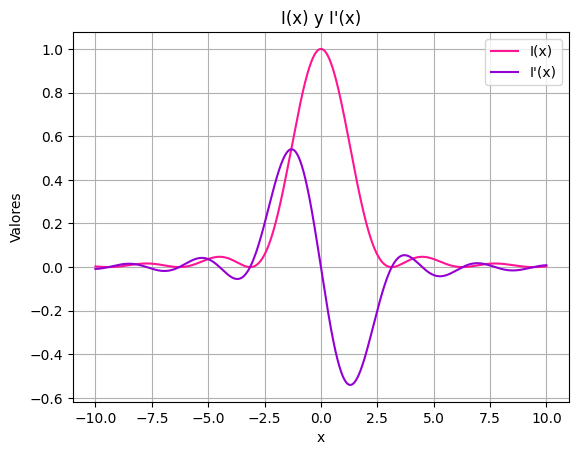

In [ ]:
#Tomamos I0 = 1
I0= 1
def I(x):
    return I0 * (np.sin(x) / x) ** 2

def Iprime(x):
  return (2 * I0 / x )*(np.cos(x) - (np.sin(x) / x))*(np.sin(x) / x)

#Graficamos I(x) y I'(x)
x_vals = np.linspace(-10, 10, 1000)
I_vals = I(x_vals)
Iprime_vals = Iprime(x_vals)

plt.plot(x_vals, I_vals, label='I(x)', color='deeppink')
plt.plot(x_vals, Iprime_vals, label='I\'(x)', color='darkviolet')
plt.title('I(x) y I\'(x)')
plt.xlabel('x')
plt.ylabel('Valores')
plt.grid()
plt.legend()
plt.show()

In [35]:
#Calcular el valor  x_1/2
def f(x):
    return I(x) - 0.5
x0 = np.pi
x1 = np.pi + 0.5

x_ = newton(f, x0=x0, x1=x1)
print(f"x_1/2 ≈ {x_:.6f}")
#profe intenté corregir por todos lados ese error y no me dió:(

RuntimeError: Tolerance of -4.6729658903259044e+23 reached. Failed to converge after 6 iterations, value is -4.6729658902710114e+23.

In [34]:
#Encontramos los máximos locales con el método de Regula Falsi
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
  c_anterior = []
  if f(a) * f(b) >= 0:
   raise ValueError("El intervalo no es válido")
  else:
    for i in range(max_iter):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        c_anterior.append(c)
        if abs(f(c)) < tol:
            return c, c_anterior, i + 1

        elif f(c) * f(a) > 0:
            a = c
        else:
            b = c
    raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

# Buscar raíces de I'(x) entre [-10, 10] con paso h = 0.5
h = 0.5
x_roots = []
x_vals = np.arange(-10, 10, h)

for i in range(len(x_vals) - 1):
    a, b = x_vals[i], x_vals[i+1]
    if Iprime(a) * Iprime(b) < 0:
      #Ignoramos los intervalos que no convergen
        try:
            c, _, _ = regula_falsi(Iprime, a, b)
            if all(abs(c - r) > 1e-4 for r in x_roots):
                x_roots.append(c)
        except Exception:
            pass

print("Máximos locales (raíces de I'(x)):")
for r in x_roots:
    print(f"x ≈ {r:.6f}, I(x) ≈ {I(r):.6f}")

Máximos locales (raíces de I'(x)):
x ≈ -9.424779, I(x) ≈ 0.000000
x ≈ -7.725252, I(x) ≈ 0.016480
x ≈ -6.283201, I(x) ≈ 0.000000
x ≈ -4.493410, I(x) ≈ 0.047190
x ≈ -3.141594, I(x) ≈ 0.000000
x ≈ 3.141594, I(x) ≈ 0.000000
x ≈ 4.493410, I(x) ≈ 0.047190
x ≈ 6.283201, I(x) ≈ 0.000000
x ≈ 7.725252, I(x) ≈ 0.016480
x ≈ 9.424779, I(x) ≈ 0.000000


<ipython-input-26-af24c88fa249>:7: RuntimeWarning: divide by zero encountered in scalar divide
  return (2 * I0 / x )*(np.cos(x) - (np.sin(x) / x))*(np.sin(x) / x)
<ipython-input-26-af24c88fa249>:7: RuntimeWarning: invalid value encountered in scalar divide
  return (2 * I0 / x )*(np.cos(x) - (np.sin(x) / x))*(np.sin(x) / x)


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

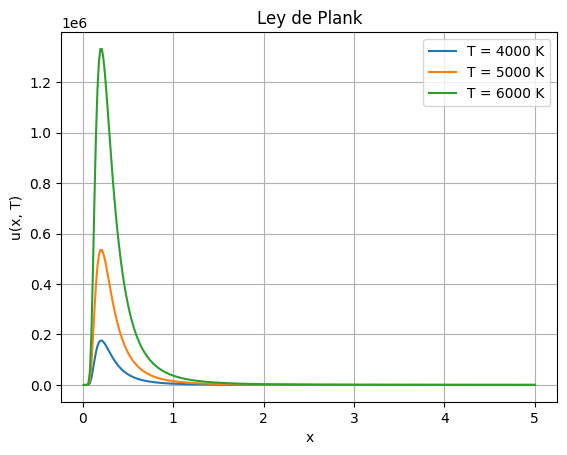

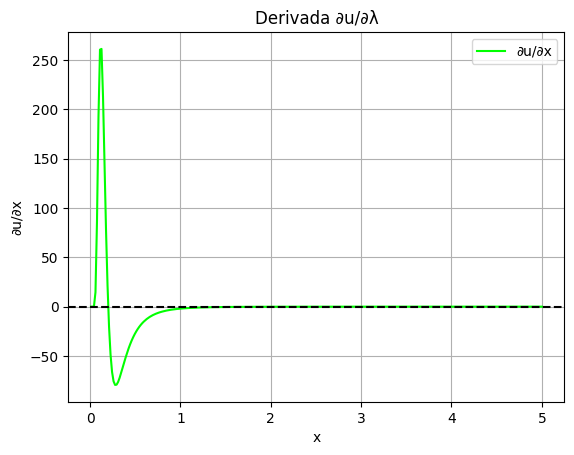

In [44]:
h=6.626e-34
kB=1.381e-23
c=2.998e8

def u(x, T):
    lambda0 = h * c / (kB * T)
    K = 8 * np.pi * h * c / lambda0**5
    return K / (x**5 * (np.exp(1/x) - 1))

def d_u(x):
  num = 5 * x + (1 - 5 * x) * np.exp(1/x)
  den = x**7 * (np.exp(1/x) - 1)**2
  return num / den

#Graficamos u(x,T), y d_u(x,T)
T_vals = [4000, 5000, 6000]
x = np.linspace(0.01, 5, 300)

for T in T_vals:
    plt.plot(x, u(x, T), label=f'T = {T} K')
plt.title('Ley de Plank')
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.grid()
plt.legend()
plt.show()

plt.plot(x, d_u(x), color = 'lime', label='∂u/∂x')
plt.axhline(0, color='black', linestyle='--')
plt.title('Derivada ∂u/∂λ')
plt.xlabel('x')
plt.ylabel('∂u/∂x')
plt.grid()
plt.legend()
plt.show()

In [60]:
#Resolver  ∂u/∂λ=0  para  T=5778  K con el método de Bisección y de Newton.
biseccion = bisect(d_u, 0.1, 5.5)
print(f'El valor de x donde u(x) es máximo con el método de la bisección es: x_max = {biseccion:.5f}')
#newton_= newton(d_u, x0=0.5)
#print(f'El valor de x donde u(x) es máximo con el método de Newton es: x_max = {newton_:.5f}')

#Validar la ley de desplazamiento de Wien
T_solar = 5778
x_val = biseccion

# Cálculo de lambda_max
lambda_max = h * c / (kB * T_solar * x_val)
wien_teorica = 2.898e-3  # m·K
wien_obtenida = lambda_max * T_solar

print(f"λ_max = {lambda_max:.3e} m")
print(f"λ_max * T = {wien_obtenida:.3e} m·K")

El valor de x donde u(x) es máximo con el método de la bisección es: x_max = 0.20141
λ_max = 1.236e-05 m
λ_max * T = 7.142e-02 m·K


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

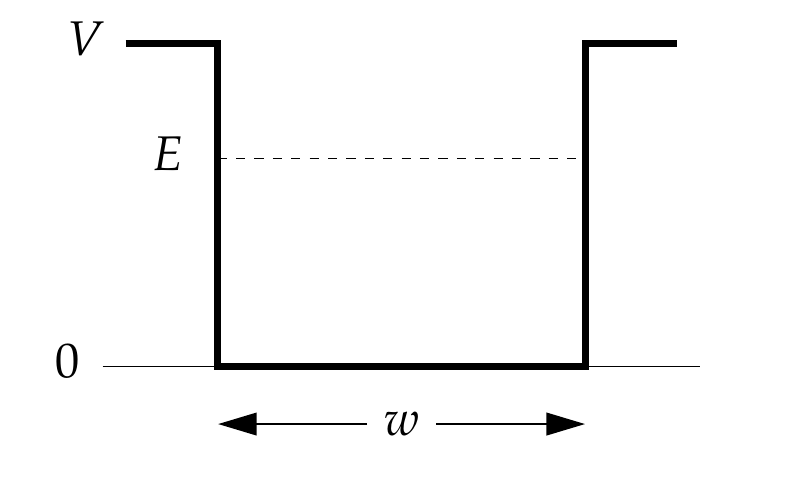

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

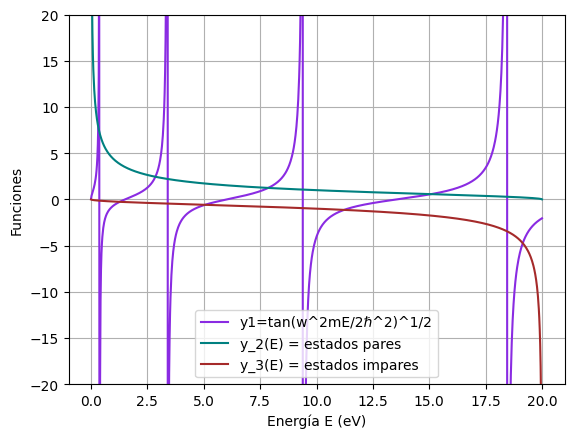

In [70]:
h_ = 1.055e-34
m = 9.11e-31
eV = 1.602e-19
w = 1e-9
V0_eV = 20
V0 = V0_eV * eV #convertimos V a Joules

#Energía E en eV (convertida luego a Joules)
E_eV = np.linspace(0.001, V0_eV - 0.001, 1000)
E = E_eV * eV

def y1(E):
    return np.tan(np.sqrt(w**2 * m * E / (2 * h_**2)))

def y2(E):
    return np.sqrt((V0 - E) / E)

def y3(E):
    return -np.sqrt(E / (V0 - E))

#Graficamos
plt.plot(E_eV, y1(E), color='blueviolet', label=r'y1=tan(w^2mE/2ℏ^2)^1/2')
plt.plot(E_eV, y2(E), color='teal', label=r'y_2(E) = estados pares')
plt.plot(E_eV, y3(E), color='brown', label=r'y_3(E) = estados impares')
plt.ylim(-20, 20)
plt.xlabel('Energía E (eV)')
plt.ylabel('Funciones')
plt.legend()
plt.grid()
plt.show()

In [77]:
#Calcular los valores de los 6 primeros niveles de energía

#Estados pares
def f_par(E_eV):
    E = E_eV * eV
    k = np.sqrt(w**2 * m * E / (2 * h_**2))
    return np.tan(k) - np.sqrt((V0 - E) / E)

#Estados impares
def f_impar(E_eV):
    E = E_eV * eV
    k = np.sqrt(w**2 * m * E / (2 * h_**2))
    return np.tan(k) + np.sqrt(E / (V0 - E))

E_vals = np.linspace(0.01, 12, 1000)
niveles_energia = []

#Raíces para estados pares
for i in range(len(E_vals) - 1):
    a, b = E_vals[i], E_vals[i + 1]
    try:
        if np.sign(f_par(a)) != np.sign(f_par(b)):
            raiz = bisect(f_par, a, b, xtol=0.001)
            niveles_energia.append((raiz, 'par'))
    except Exception:
        pass

#Raíces para estados impares
for i in range(len(E_vals) - 1):
    a, b = E_vals[i], E_vals[i + 1]
    try:
        if np.sign(f_impar(a)) != np.sign(f_impar(b)):
            raiz = bisect(f_impar, a, b, xtol=0.001)
            niveles_energia.append((raiz, 'impar'))
    except Exception:
        pass

#Eliminamos los repetidos
niveles_energia = list(set(niveles_energia))

niveles_energia.sort()

print('Niveles de energía:')
for i, (E, p_i) in enumerate(niveles_energia):
    print(f'Nivel {i} ({p_i}): E = {E:.3f} eV')

Niveles de energía:
Nivel 0 (par): E = 0.318 eV
Nivel 1 (impar): E = 0.377 eV
Nivel 2 (par): E = 0.377 eV
Nivel 3 (impar): E = 1.271 eV
Nivel 4 (par): E = 2.854 eV
Nivel 5 (impar): E = 3.388 eV
Nivel 6 (par): E = 3.388 eV
Nivel 7 (impar): E = 5.055 eV
Nivel 8 (par): E = 7.856 eV
Nivel 9 (impar): E = 9.408 eV
Nivel 10 (par): E = 9.408 eV
Nivel 11 (impar): E = 11.224 eV


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [79]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

def f(r):
  t1 = G * M / r**2
  t2 = G * m / (R - r)**2
  t3 = w**2 * r
  return t1 - t2 - t3

#Punto inicial (aproximadamente a mitad del camino Tierra-Luna)
r0 = R / 2

# Método de Newton
raiz_newton = newton(f, x0=r0)
print(f"La distancia desde la Tierra hasta L1 es aproximadamente: {raiz_newton/1000} km")

La distancia desde la Tierra hasta L1 es aproximadamente: 326045.07166535547 km
